In [214]:
import sqlite3 as sql3
import pandas as pd
import matplotlib.pyplot as plt

In [215]:
class Pokemon():
    def __init__(self):
        self.conexao = sql3.connect('../../database/Pokemon.db')
        self.cursor = self.conexao.cursor()
        self.pokemons= self.cursor.execute('SELECT count(id) FROM pokemon;').fetchone()[0]
        self.dados=pd.read_sql('SELECT * FROM pokemon;',self.conexao)

    def fortes(self):
        df=self.dados[['Total', 'Name']]
        df=df.nlargest(5, 'Total')
        return df
    def rapidos(self):
        df=self.dados[['Speed','Name']]
        df=df.nlargest(5, 'Speed')
        return df
    def frageis(self):
        df=self.dados[['SpDef','HP','Defense','Name']]
        df['fragilidade'] = (df['HP'].astype(int) * (df['Defense'].astype(int)+df['SpDef'].astype(int)))
        max=df['fragilidade'].max()
        df=df.nsmallest(5,'fragilidade')
        df['fragilidade'] = df['fragilidade'].astype(int)/max
        return df
    def ofensivos(self):
        df=self.dados[['SpAtk','Attack','Name']]
        df['poder ofensivo'] = (df['SpAtk'].astype(int)+df['Attack'].astype(int))
        df=df.nlargest(5,'poder ofensivo')
        return df
pokemon=Pokemon()

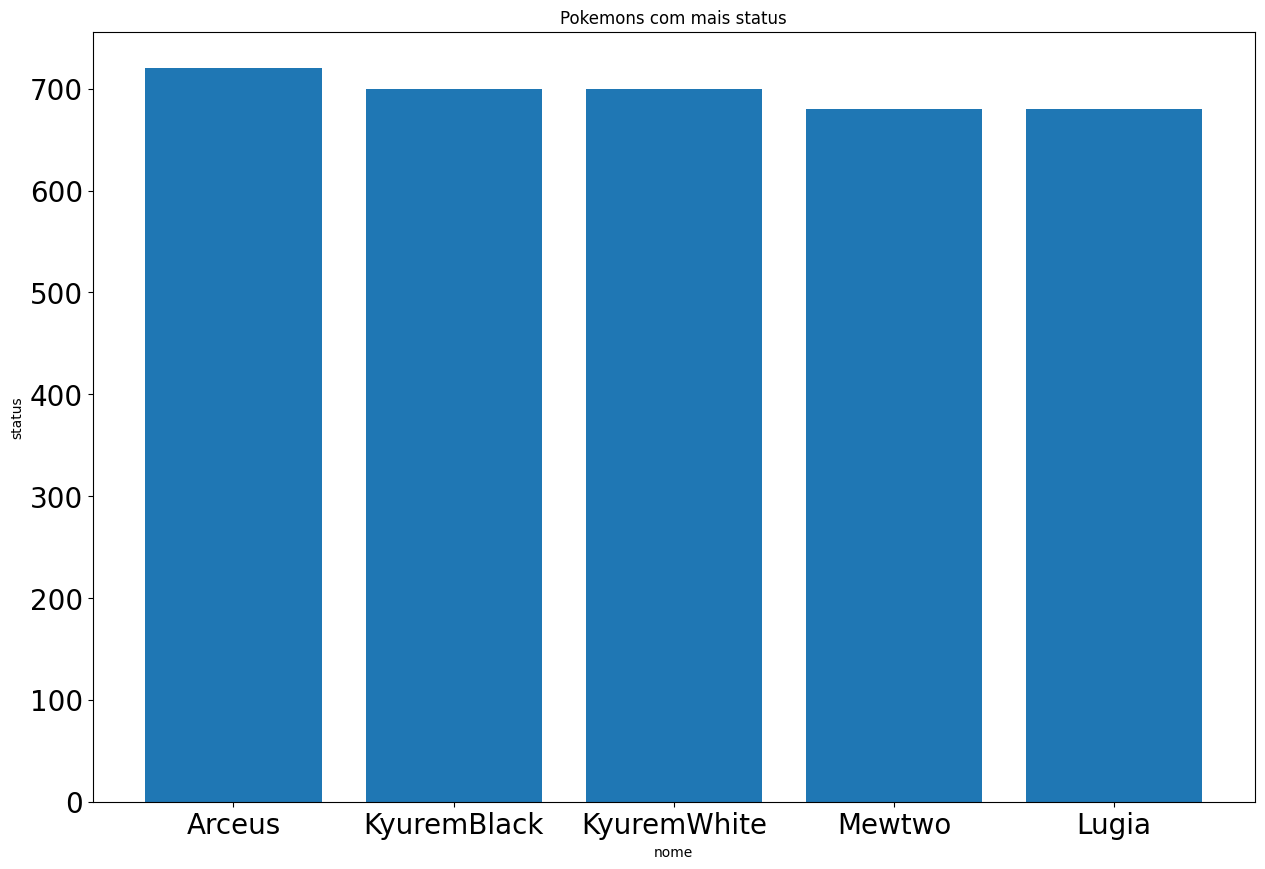

In [216]:
df=pokemon.fortes()
totais=[]
nomes=[]

for Total in df['Total']:
    totais.append(Total)
for Name in df['Name']:
    Name=Name.split(' ')[0]
    nomes.append(Name)

# Criar gráfico de barras
plt.figure(figsize=(15, 10)) 
plt.bar(nomes, totais)

# Adicionar título e rótulos aos eixos
plt.title('Pokemons com mais status')
plt.xlabel('nome')
plt.ylabel('status')
plt.xticks(fontsize=20)  # Tamanho da fonte para os rótulos do eixo X
plt.yticks(fontsize=20)

# Mostrar o gráfico
plt.show()

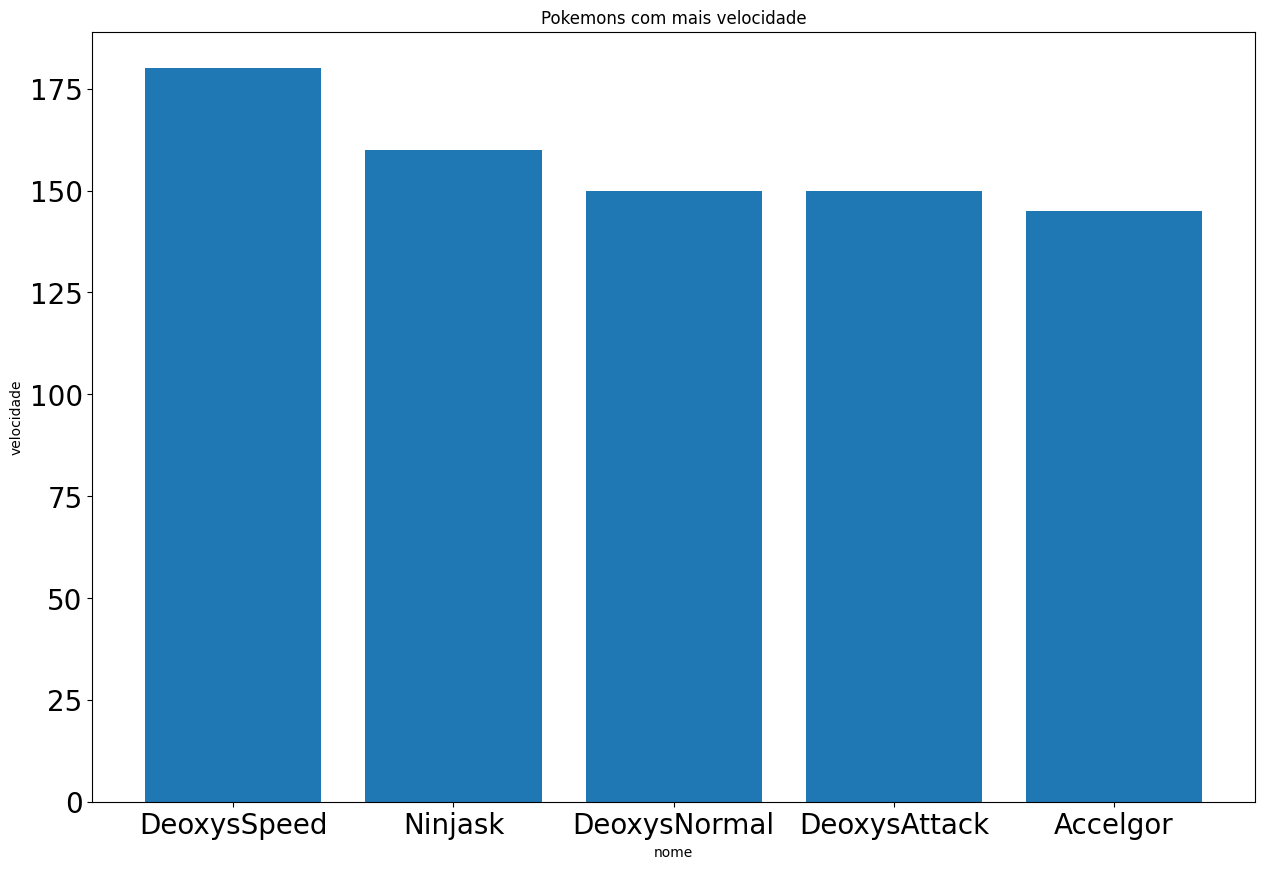

In [217]:
df=pokemon.rapidos()
totais=[]
nomes=[]

for Speed in df['Speed']:
    totais.append(Speed)
for Name in df['Name']:
    Name=Name.split(' ')[0]
    nomes.append(Name)

# Criar gráfico de barras
plt.figure(figsize=(15, 10))
plt.bar(nomes, totais)

# Adicionar título e rótulos aos eixos
plt.title('Pokemons com mais velocidade')
plt.xlabel('nome')
plt.ylabel('velocidade')
plt.xticks(fontsize=20)  # Tamanho da fonte para os rótulos do eixo X
plt.yticks(fontsize=20)

# Mostrar o gráfico
plt.show()

/tmp/ipykernel_1287/2318818734.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fragilidade'] = (df['HP'].astype(int) * (df['Defense'].astype(int)+df['SpDef'].astype(int)))


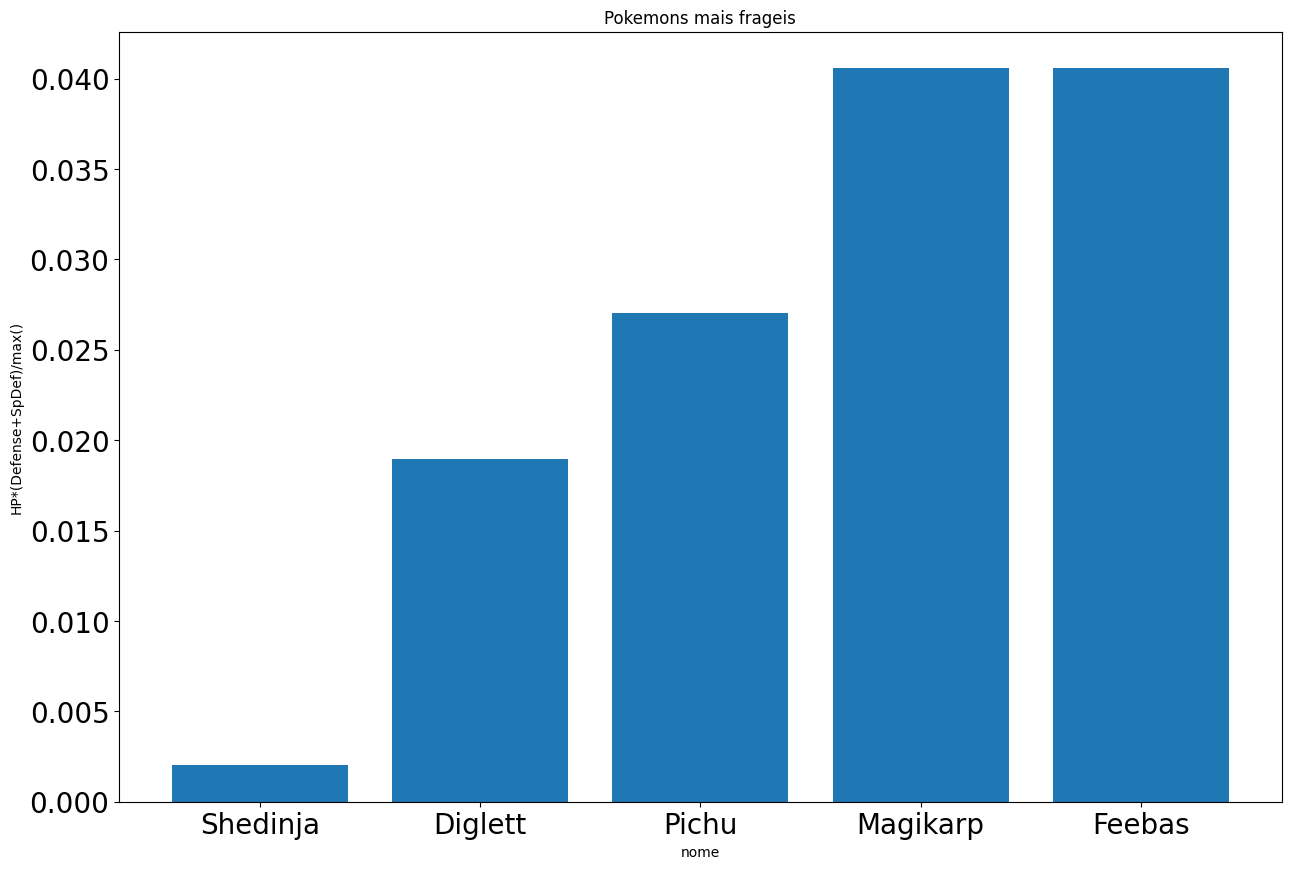

In [218]:
df=pokemon.frageis()
totais=[]
nomes=[]

for hp in df['fragilidade']:
    totais.append(hp)
for Name in df['Name']:
    Name=Name.split(' ')[0]
    nomes.append(Name)
# Criar gráfico de barras
plt.figure(figsize=(15, 10))
plt.bar(nomes, totais)

# Adicionar título e rótulos aos eixos
plt.title('Pokemons mais frageis')
plt.xlabel('nome')
plt.ylabel('HP*(Defense+SpDef)/max()')
plt.xticks(fontsize=20)  # Tamanho da fonte para os rótulos do eixo X
plt.yticks(fontsize=20)

# Mostrar o gráfico
plt.show()

/tmp/ipykernel_1287/2318818734.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poder ofensivo'] = (df['SpAtk'].astype(int)+df['Attack'].astype(int))


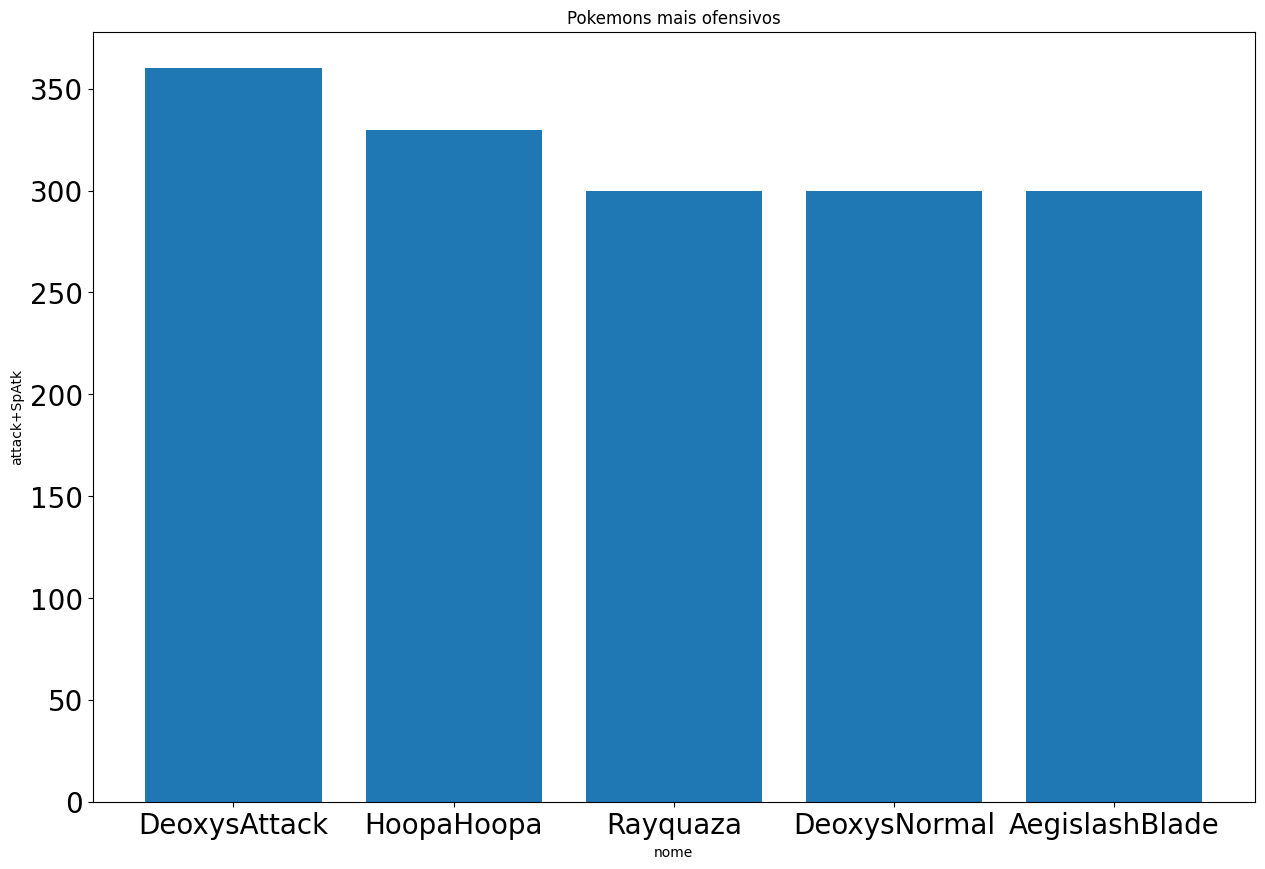

In [219]:
df=pokemon.ofensivos()
totais=[]
nomes=[]

for hp in df['poder ofensivo']:
    totais.append(hp)
for Name in df['Name']:
    Name=Name.split(' ')[0]
    nomes.append(Name)
# Criar gráfico de barras
plt.figure(figsize=(15, 10))
plt.bar(nomes, totais)

# Adicionar título e rótulos aos eixos
plt.title('Pokemons mais ofensivos')
plt.xlabel('nome')
plt.ylabel('attack+SpAtk')
plt.xticks(fontsize=20)  # Tamanho da fonte para os rótulos do eixo X
plt.yticks(fontsize=20)

# Mostrar o gráfico
plt.show()